In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from pathlib import Path as Path

In [2]:
import pandas as pd
import glob

path = r'C:/Users/pearl/Downloads/cyclistic_data' # use your path
extension = 'csv'
all_files = [i for i in glob.glob('*.{}'.format(extension))]
#all_files = glob.glob(path + "/*.csv")

# create list to append to
li = []

# loop through file names in the variable named 'all_files'
for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)

print(li)

merged_cyclistic = pd.concat(li, axis=0, ignore_index=True)


[                 ride_id  rideable_type           started_at  \
0       550CF7EFEAE0C618  electric_bike  2022-08-07 21:34:15   
1       DAD198F405F9C5F5  electric_bike  2022-08-08 14:39:21   
2       E6F2BC47B65CB7FD  electric_bike  2022-08-08 15:29:50   
3       F597830181C2E13C  electric_bike  2022-08-08 02:43:50   
4       0CE689BB4E313E8D  electric_bike  2022-08-07 20:24:06   
...                  ...            ...                  ...   
785927  EC17BE8AB1D73C88  electric_bike  2022-08-12 08:28:26   
785928  57BAC0EA3A067A83  electric_bike  2022-08-22 12:30:19   
785929  9B97FAE30276C299  electric_bike  2022-08-09 07:43:31   
785930  2B4A9BA1E9AA9B51  electric_bike  2022-08-24 14:31:58   
785931  7F0D048AC7C3B81A  electric_bike  2022-08-24 09:45:04   

                   ended_at            start_station_name start_station_id  \
0       2022-08-07 21:41:46                           NaN              NaN   
1       2022-08-08 14:53:23                           NaN              NaN

In [3]:
merged_cyclistic.shape

(5915257, 13)

In [4]:
merged_cyclistic.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [5]:
merged_cyclistic.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual


In [6]:
merged_cyclistic.to_csv('merged_cyclistic.csv')


In [7]:
merged_cyclistic.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [8]:
merged_cyclistic['start_lat'] = merged_cyclistic.start_lat.astype('category')

In [9]:
merged_cyclistic = merged_cyclistic.astype(str)

In [10]:
merged_cyclistic['member_casual'].value_counts()

member    3523487
casual    2391770
Name: member_casual, dtype: int64

In [11]:
merged_cyclistic['end_station_name'].value_counts()

nan                                                    946240
Streeter Dr & Grand Ave                                 76900
DuSable Lake Shore Dr & North Blvd                      42581
DuSable Lake Shore Dr & Monroe St                       41077
Michigan Ave & Oak St                                   40920
                                                        ...  
The Montessori School of Englewood                          1
Linder Ave & Archer Ave                                     1
Public Rack - California Ave & Touhy Ave - midblock         1
Central Ave & Adams St                                      1
Public Rack - Strohacker Park                               1
Name: end_station_name, Length: 1695, dtype: int64

In [12]:
merged_cyclistic.describe()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,5915257,5915257,5915257,5915257,5915257,5915257,5915257,5915257,5915257,5915257,5915257,5915257,5915257
unique,5915257,3,4974707,4987290,1677,1314,1695,1318,679207,641347,31448,31262,2
top,550CF7EFEAE0C618,electric_bike,2022-05-30 13:05:15,2022-08-22 12:47:49,nan,nan,nan,nan,41.93,-87.65,41.93,-87.65,member
freq,1,3031006,9,20,884127,884127,946240,946240,98540,129537,100958,134800,3523487


In [14]:
merged_cyclistic['start_lng'].value_counts()

-87.65                129537
-87.63                 98434
-87.64                 86888
-87.66                 79388
-87.69                 70523
                       ...  
-87.648616195              1
-87.68477516666667         1
-87.659245372              1
-87.61902716666667         1
-87.659650683              1
Name: start_lng, Length: 641347, dtype: int64

In [15]:
cylistically = df.copy() 
# Pandas Deep copy leaves the initial DataFrame unchanged.


In [16]:
Path('merged_cyclistic.db').touch()
cyclist_conn = sqlite3.connect('merged_cyclistic.db')
cyclist_cursor = cyclist_conn.cursor()

In [17]:

merged_cyclistic.to_sql('merged_cyclistic', cyclist_conn, if_exists='append', index=False)

In [18]:
merged_cyclistic_init_query = pd.read_sql(''' SELECT * FROM merged_cyclistic ''', cyclist_conn)
merged_cyclistic_init_query

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,nan,nan,nan,nan,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,nan,nan,nan,nan,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,nan,nan,nan,nan,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,nan,nan,nan,nan,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,nan,nan,nan,nan,41.85,-87.65,41.84,-87.66,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915252,32ECA2B32C4B6F85,classic_bike,2022-09-05 17:59:21,2022-09-05 18:19:07,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97491129677,-87.6925025594,41.965221,-87.658139,member
5915253,14801F713026AEAE,classic_bike,2022-09-30 17:20:54,2022-09-30 17:34:40,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.9840446107,-87.6602738295,41.965221,-87.658139,member
5915254,7CCAF5D6E88E45C0,electric_bike,2022-09-04 11:39:37,2022-09-04 11:50:55,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.984112263,-87.660268545,41.965221,-87.658139,member
5915255,AF9A129D9AFAA40B,electric_bike,2022-09-28 13:42:45,2022-09-28 13:52:59,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97492066666667,-87.69273483333333,41.965221,-87.658139,member


In [24]:
data_analysis_query = pd.read_sql(''' SELECT * 
                                      FROM merged_cyclistic
                                      WHERE start_station_name is 'nan' ''', cyclist_conn)
data_analysis_query

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,nan,nan,nan,nan,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,nan,nan,nan,nan,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,nan,nan,nan,nan,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,nan,nan,nan,nan,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,nan,nan,nan,nan,41.85,-87.65,41.84,-87.66,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884122,9B4076262406176D,electric_bike,2022-09-29 09:10:08,2022-09-29 09:18:51,nan,nan,Ashland Ave & Pershing Rd,16932,41.85,-87.68,41.823465,-87.665577,member
884123,8DC00AF0199C3C8E,electric_bike,2022-09-14 15:52:58,2022-09-14 15:58:47,nan,nan,Milwaukee Ave & Wabansia Ave,13243,41.91,-87.67,41.912616,-87.681391,member
884124,B2FD31C8A62B7EC7,electric_bike,2022-09-02 04:17:57,2022-09-02 04:23:35,nan,nan,Southport Ave & Roscoe St,13071,41.94,-87.65,41.943739,-87.66402,member
884125,F2C7594D6CE3FD7D,electric_bike,2022-09-07 20:49:31,2022-09-07 21:12:59,nan,nan,Central Park Ave & Ogden Ave,15685,41.88,-87.73,41.854063503874464,-87.71511733531952,member


In [21]:
data_analysis_query_1 = pd.read_sql(''' SELECT start_station_id, start_lat, start_station_name, start_lng
                                      FROM merged_cyclistic
                                      WHERE start_lat = 41.93 AND start_lng = -87.69 AND start_station_id IS NOT NULL''', cyclist_conn)
data_analysis_query_1
# trying to confirm if some rides had the same start lng and lat to verify the naming convention used

,start_station_id,start_lat,start_station_name,start_lng
0,nan,41.93,nan,-87.69
1,nan,41.93,nan,-87.69
2,nan,41.93,nan,-87.69
3,nan,41.93,nan,-87.69
4,nan,41.93,nan,-87.69
...,...,...,...,...
6348,nan,41.93,nan,-87.69
6349,nan,41.93,nan,-87.69
6350,nan,41.93,nan,-87.69
6351,nan,41.93,nan,-87.69


In [26]:
data_analysis_query_2 = pd.read_sql(''' SELECT start_station_id, start_lat, start_station_name, start_lng
                                      FROM merged_cyclistic
                                      WHERE start_lat = 41.89 AND start_lng = -87.64 AND start_station_id IS NOT NULL AND start_station_name IS NOT 'nan' ''', cyclist_conn)
data_analysis_query_2
# trying to confirm if some rides had the same start lng and lat to verify the naming convention used

,start_station_id,start_lat,start_station_name,start_lng
0,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
1,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
2,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
3,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
4,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
5,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
6,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
7,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
8,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
9,321,41.89,Kostner Ave & Wrightwood Ave,-87.64


In [28]:
data_analysis_query_3 = pd.read_sql(''' SELECT start_station_id, start_lat, start_station_name, start_lng
                                      FROM merged_cyclistic
                                      WHERE start_lat = 41.89 AND start_lng = -87.64 AND start_station_id IS NOT NULL AND start_station_name IS NOT 'nan' ''', cyclist_conn)
data_analysis_query_3
#  TO FIND HOW MANY ROWS HAVE  THE SAME LONG AND LANG BUT ARE STILL NONE AND THOSE WITH VALUES

,start_station_id,start_lat,start_station_name,start_lng
0,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
1,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
2,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
3,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
4,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
5,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
6,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
7,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
8,321,41.89,Kostner Ave & Wrightwood Ave,-87.64
9,321,41.89,Kostner Ave & Wrightwood Ave,-87.64


In [35]:
data_analysis_query_4 = pd.read_sql(''' SELECT start_station_id, start_lat, start_station_name, start_lng,
                                    DENSE_RANK() OVER(PARTITION BY start_station_name ORDER BY start_lng, start_lat) AS rank
                                      FROM merged_cyclistic
                                      WHERE start_station_id IS 'nan' ''', cyclist_conn)
data_analysis_query_4

# TO FIND OUT HOW MANY ROWS HAVE THE SAME LONGITUDE AND LANGITUDE

,start_station_id,start_lat,start_station_name,start_lng,rank
0,nan,41.69,nan,-87.52,1
1,nan,41.69,nan,-87.52,1
2,nan,41.69,nan,-87.52,1
3,nan,41.69,nan,-87.52,1
4,nan,41.69,nan,-87.52,1
...,...,...,...,...,...
884122,nan,41.95,nan,-87.84,624
884123,nan,41.95,nan,-87.84,624
884124,nan,41.95,nan,-87.84,624
884125,nan,41.95,nan,-87.84,624


In [31]:
''' write a funtion that goes through the 624 rows having the same long and lang
    and mathches them with rows with the same long and lang 
    but have start staion id and name
    - couldnt really appropriate it well, so decided to drop those 
    values as they are just a tiny fraction out of the 5 million values'''  



' write a funtion that goes through the 624 rows having the same long and lang\n    and mathches them with rows with the same long and lang \n    but have start staion id and name'

In [36]:
data_analysis_query_4 = pd.read_sql(''' SELECT end_lat, end_lng, end_station_name, end_station_id,
                                    DENSE_RANK() OVER(PARTITION BY end_station_name ORDER BY end_lat, end_lng) AS rank
                                      FROM merged_cyclistic
                                      WHERE end_station_name IS 'nan' ''', cyclist_conn)
data_analysis_query_4

# TO FIND OUT HOW MANY ROWS HAVE THE SAME LONGITUDE AND 
# LANGITUDE howver there are some stations with none as end lang and long

,end_lat,end_lng,end_station_name,end_station_id,rank
0,41.48,-87.65,nan,nan,1
1,41.55,-87.3,nan,nan,2
2,41.55,-87.3,nan,nan,2
3,41.55,-87.3,nan,nan,2
4,41.55,-87.3,nan,nan,2
...,...,...,...,...,...
946235,nan,nan,nan,nan,887
946236,nan,nan,nan,nan,887
946237,nan,nan,nan,nan,887
946238,nan,nan,nan,nan,887


In [52]:
merged_cyclistic_new =merged_cyclistic.replace('nan', pd.NA).dropna()
merged_cyclistic_new
# to drop values that are null we first 
# had to convert string nan to null as using .dropna alone was not working

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.79156801058,-87.6078521774,41.803038,-87.606615,casual
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673333333335,-87.67207516666667,41.895634,-87.672069,casual
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915252,32ECA2B32C4B6F85,classic_bike,2022-09-05 17:59:21,2022-09-05 18:19:07,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97491129677,-87.6925025594,41.965221,-87.658139,member
5915253,14801F713026AEAE,classic_bike,2022-09-30 17:20:54,2022-09-30 17:34:40,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.9840446107,-87.6602738295,41.965221,-87.658139,member
5915254,7CCAF5D6E88E45C0,electric_bike,2022-09-04 11:39:37,2022-09-04 11:50:55,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.984112263,-87.660268545,41.965221,-87.658139,member
5915255,AF9A129D9AFAA40B,electric_bike,2022-09-28 13:42:45,2022-09-28 13:52:59,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97492066666667,-87.69273483333333,41.965221,-87.658139,member


In [55]:
merged_cyclistic_new.shape
merged_cyclistic_new.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [56]:
merged_cyclistic_new['started_at'] = pd.to_datetime(merged_cyclistic_new['started_at'])     # skip if your Date column already in datetime format
merged_cyclistic_new['Day of Week'] = merged_cyclistic_new['started_at'].dt.day_name()
merged_cyclistic_new

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day of Week
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.79156801058,-87.6078521774,41.803038,-87.606615,casual,Friday
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Thursday
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,Sunday
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673333333335,-87.67207516666667,41.895634,-87.672069,casual,Sunday
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915252,32ECA2B32C4B6F85,classic_bike,2022-09-05 17:59:21,2022-09-05 18:19:07,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97491129677,-87.6925025594,41.965221,-87.658139,member,Monday
5915253,14801F713026AEAE,classic_bike,2022-09-30 17:20:54,2022-09-30 17:34:40,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.9840446107,-87.6602738295,41.965221,-87.658139,member,Friday
5915254,7CCAF5D6E88E45C0,electric_bike,2022-09-04 11:39:37,2022-09-04 11:50:55,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.984112263,-87.660268545,41.965221,-87.658139,member,Sunday
5915255,AF9A129D9AFAA40B,electric_bike,2022-09-28 13:42:45,2022-09-28 13:52:59,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97492066666667,-87.69273483333333,41.965221,-87.658139,member,Wednesday


In [57]:
merged_cyclistic_new['start_time'] = merged_cyclistic_new['started_at'].dt.time
merged_cyclistic_new

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day of Week,start_time
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.79156801058,-87.6078521774,41.803038,-87.606615,casual,Friday,16:13:36
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Thursday,23:30:11
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,Sunday,14:09:08
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673333333335,-87.67207516666667,41.895634,-87.672069,casual,Sunday,16:15:12
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Sunday,02:11:26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915252,32ECA2B32C4B6F85,classic_bike,2022-09-05 17:59:21,2022-09-05 18:19:07,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97491129677,-87.6925025594,41.965221,-87.658139,member,Monday,17:59:21
5915253,14801F713026AEAE,classic_bike,2022-09-30 17:20:54,2022-09-30 17:34:40,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.9840446107,-87.6602738295,41.965221,-87.658139,member,Friday,17:20:54
5915254,7CCAF5D6E88E45C0,electric_bike,2022-09-04 11:39:37,2022-09-04 11:50:55,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.984112263,-87.660268545,41.965221,-87.658139,member,Sunday,11:39:37
5915255,AF9A129D9AFAA40B,electric_bike,2022-09-28 13:42:45,2022-09-28 13:52:59,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97492066666667,-87.69273483333333,41.965221,-87.658139,member,Wednesday,13:42:45


In [58]:
merged_cyclistic_new['ended_at'] = pd.to_datetime(merged_cyclistic_new['ended_at']) 
merged_cyclistic_new['end_time'] = merged_cyclistic_new['ended_at'].dt.time
merged_cyclistic_new

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day of Week,start_time,end_time
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.79156801058,-87.6078521774,41.803038,-87.606615,casual,Friday,16:13:36,16:22:40
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Thursday,23:30:11,23:30:56
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,Sunday,14:09:08,15:10:46
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673333333335,-87.67207516666667,41.895634,-87.672069,casual,Sunday,16:15:12,16:29:30
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Sunday,02:11:26,03:44:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915252,32ECA2B32C4B6F85,classic_bike,2022-09-05 17:59:21,2022-09-05 18:19:07,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97491129677,-87.6925025594,41.965221,-87.658139,member,Monday,17:59:21,18:19:07
5915253,14801F713026AEAE,classic_bike,2022-09-30 17:20:54,2022-09-30 17:34:40,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.9840446107,-87.6602738295,41.965221,-87.658139,member,Friday,17:20:54,17:34:40
5915254,7CCAF5D6E88E45C0,electric_bike,2022-09-04 11:39:37,2022-09-04 11:50:55,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.984112263,-87.660268545,41.965221,-87.658139,member,Sunday,11:39:37,11:50:55
5915255,AF9A129D9AFAA40B,electric_bike,2022-09-28 13:42:45,2022-09-28 13:52:59,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97492066666667,-87.69273483333333,41.965221,-87.658139,member,Wednesday,13:42:45,13:52:59


In [59]:
merged_cyclistic_new['month_name'] = merged_cyclistic_new['started_at'].dt.month_name()
merged_cyclistic_new

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day of Week,start_time,end_time,month_name
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.79156801058,-87.6078521774,41.803038,-87.606615,casual,Friday,16:13:36,16:22:40,August
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Thursday,23:30:11,23:30:56,August
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,Sunday,14:09:08,15:10:46,August
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673333333335,-87.67207516666667,41.895634,-87.672069,casual,Sunday,16:15:12,16:29:30,August
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Sunday,02:11:26,03:44:04,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915252,32ECA2B32C4B6F85,classic_bike,2022-09-05 17:59:21,2022-09-05 18:19:07,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97491129677,-87.6925025594,41.965221,-87.658139,member,Monday,17:59:21,18:19:07,September
5915253,14801F713026AEAE,classic_bike,2022-09-30 17:20:54,2022-09-30 17:34:40,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.9840446107,-87.6602738295,41.965221,-87.658139,member,Friday,17:20:54,17:34:40,September
5915254,7CCAF5D6E88E45C0,electric_bike,2022-09-04 11:39:37,2022-09-04 11:50:55,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.984112263,-87.660268545,41.965221,-87.658139,member,Sunday,11:39:37,11:50:55,September
5915255,AF9A129D9AFAA40B,electric_bike,2022-09-28 13:42:45,2022-09-28 13:52:59,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97492066666667,-87.69273483333333,41.965221,-87.658139,member,Wednesday,13:42:45,13:52:59,September


In [64]:
merged_cyclistic_new.to_csv('merged_cyclistic_new.csv')

In [65]:
# creating new table in already existing db
merged_cyclistic_new.to_sql('merged_cyclistic_new', cyclist_conn, if_exists='fail', index=False)

/Users/pearl/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [66]:
# to find the tables in our database
data_analysis_query_5 = pd.read_sql(''' SELECT * FROM sqlite_master where type='table' ''', cyclist_conn)
data_analysis_query_5

,type,name,tbl_name,rootpage,sql
0,table,merged_cyclistic,merged_cyclistic,2,"CREATE TABLE ""merged_cyclistic"" (\n""ride_id"" T..."
1,table,merged_cyclistic_new,merged_cyclistic_new,288096,"CREATE TABLE ""merged_cyclistic_new"" (\n""ride_i..."


In [61]:
merged_cyclistic_new.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                     object
start_lng                     object
end_lat                       object
end_lng                       object
member_casual                 object
Day of Week                   object
start_time                    object
end_time                      object
month_name                    object
dtype: object

In [62]:
# to find the number of seconds used per rider
merged_cyclistic_new['time_diff'] = (merged_cyclistic_new['ended_at'] - merged_cyclistic_new['started_at']).dt.total_seconds()
merged_cyclistic_new

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day of Week,start_time,end_time,month_name,time_diff
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.79156801058,-87.6078521774,41.803038,-87.606615,casual,Friday,16:13:36,16:22:40,August,544.0
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Thursday,23:30:11,23:30:56,August,45.0
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,Sunday,14:09:08,15:10:46,August,3698.0
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673333333335,-87.67207516666667,41.895634,-87.672069,casual,Sunday,16:15:12,16:29:30,August,858.0
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Sunday,02:11:26,03:44:04,August,5558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5915252,32ECA2B32C4B6F85,classic_bike,2022-09-05 17:59:21,2022-09-05 18:19:07,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97491129677,-87.6925025594,41.965221,-87.658139,member,Monday,17:59:21,18:19:07,September,1186.0
5915253,14801F713026AEAE,classic_bike,2022-09-30 17:20:54,2022-09-30 17:34:40,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.9840446107,-87.6602738295,41.965221,-87.658139,member,Friday,17:20:54,17:34:40,September,826.0
5915254,7CCAF5D6E88E45C0,electric_bike,2022-09-04 11:39:37,2022-09-04 11:50:55,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.984112263,-87.660268545,41.965221,-87.658139,member,Sunday,11:39:37,11:50:55,September,678.0
5915255,AF9A129D9AFAA40B,electric_bike,2022-09-28 13:42:45,2022-09-28 13:52:59,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97492066666667,-87.69273483333333,41.965221,-87.658139,member,Wednesday,13:42:45,13:52:59,September,614.0


In [63]:
# to determine if there are any duplicate rides
duplicateRows = merged_cyclistic_new[merged_cyclistic_new.duplicated(['ride_id'])]
print(duplicateRows)

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, Day of Week, start_time, end_time, month_name, time_diff]
Index: []


In [67]:
# to find rows where time_diff is 0 or > 0
df = merged_cyclistic_new.loc[merged_cyclistic_new['time_diff'] == 0]
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day of Week,start_time,end_time,month_name,time_diff
13139,162024EA2A5F23AC,electric_bike,2022-08-18 18:16:28,2022-08-18 18:16:28,Cottage Grove Ave & 51st St,TA1309000067,Cottage Grove Ave & 51st St,TA1309000067,41.803033471,-87.606625676,41.803038,-87.606615,member,Thursday,18:16:28,18:16:28,August,0.0
63114,8B5EDA7571220F96,electric_bike,2022-08-05 18:28:39,2022-08-05 18:28:39,Sheridan Rd & Irving Park Rd,13063,Sheridan Rd & Irving Park Rd,13063,41.954142,-87.65442233333333,41.954245,-87.654406,member,Friday,18:28:39,18:28:39,August,0.0
65073,09B71177D92C0DC5,classic_bike,2022-08-05 17:40:06,2022-08-05 17:40:06,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.90096039,-87.62377664,41.90096039,-87.62377664,casual,Friday,17:40:06,17:40:06,August,0.0
118326,9EF99F49CDEAF18C,classic_bike,2022-08-30 13:28:47,2022-08-30 13:28:47,Greenview Ave & Diversey Pkwy,13294,Greenview Ave & Diversey Pkwy,13294,41.93258963429789,-87.66593635082245,41.93258963429789,-87.66593635082245,member,Tuesday,13:28:47,13:28:47,August,0.0
124380,F63E2BA5D00BBAB8,classic_bike,2022-08-04 15:26:01,2022-08-04 15:26:01,Clarendon Ave & Junior Ter,13389,Clarendon Ave & Junior Ter,13389,41.961004,-87.649603,41.961004,-87.649603,casual,Thursday,15:26:01,15:26:01,August,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533904,8AFC3499323C4230,electric_bike,2022-09-12 08:30:08,2022-09-12 08:30:08,Aberdeen St & Jackson Blvd,13157,Aberdeen St & Jackson Blvd,13157,41.87781116666667,-87.65480216666667,41.87772613,-87.65478743,member,Monday,08:30:08,08:30:08,September,0.0
5564178,DA2B8E3E728CE90F,electric_bike,2022-09-18 17:43:26,2022-09-18 17:43:26,Ashland Ave & Wellington Ave,13269,Ashland Ave & Wellington Ave,13269,41.936034166666666,-87.669885,41.936083,-87.669807,member,Sunday,17:43:26,17:43:26,September,0.0
5586485,657505824F33C61D,electric_bike,2022-09-04 02:08:51,2022-09-04 02:08:51,Southport Ave & Roscoe St,13071,N Southport Ave & W Newport Ave,20257.0,41.9437265,-87.6639585,41.94,-87.66,member,Sunday,02:08:51,02:08:51,September,0.0
5682852,9357F4437F6D4EBE,electric_bike,2022-09-07 17:22:58,2022-09-07 17:22:58,Kingsbury St & Erie St,13265,Kingsbury St & Erie St,13265,41.8937095,-87.64161416666667,41.89380805624359,-87.64169722795485,casual,Wednesday,17:22:58,17:22:58,September,0.0


In [70]:
# to find rows where time_diff is < 0
dfs = merged_cyclistic_new.loc[merged_cyclistic_new['time_diff'] < 0]
dfs.shape

(69, 18)

In [71]:
#  to drop rows where time_diff. = 0 or less than 0
merged_cyclistic_new = merged_cyclistic_new[merged_cyclistic_new['time_diff'] > 0]


In [73]:
# to find rows where time_diff is still <= 0 and its none
dfs = merged_cyclistic_new.loc[merged_cyclistic_new['time_diff'] < 0]
dfs

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day of Week,start_time,end_time,month_name,time_diff


In [75]:
merged_cyclistic_new['month_name'].value_counts()

July         642629
June         620311
August       605275
September    535119
May          502516
October      414238
December     311762
April        272546
November     255752
March        215971
February      89174
January       80128
Name: month_name, dtype: int64

In [76]:
# replacing new table in already existing db
merged_cyclistic_new.to_sql('merged_cyclistic_new', cyclist_conn, if_exists='replace', index=False)

/Users/pearl/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [79]:
merged_cyclistic_new_init_query = pd.read_sql(''' SELECT * FROM merged_cyclistic_new ''', cyclist_conn)
merged_cyclistic_new_init_query 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day of Week,start_time,end_time,month_name,time_diff
0,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.79156801058,-87.6078521774,41.803038,-87.606615,casual,Friday,16:13:36.000000,16:22:40.000000,August,544.0
1,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Thursday,23:30:11.000000,23:30:56.000000,August,45.0
2,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,Sunday,14:09:08.000000,15:10:46.000000,August,3698.0
3,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673333333335,-87.67207516666667,41.895634,-87.672069,casual,Sunday,16:15:12.000000,16:29:30.000000,August,858.0
4,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,Sunday,02:11:26.000000,03:44:04.000000,August,5558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545416,32ECA2B32C4B6F85,classic_bike,2022-09-05 17:59:21,2022-09-05 18:19:07,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97491129677,-87.6925025594,41.965221,-87.658139,member,Monday,17:59:21.000000,18:19:07.000000,September,1186.0
4545417,14801F713026AEAE,classic_bike,2022-09-30 17:20:54,2022-09-30 17:34:40,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.9840446107,-87.6602738295,41.965221,-87.658139,member,Friday,17:20:54.000000,17:34:40.000000,September,826.0
4545418,7CCAF5D6E88E45C0,electric_bike,2022-09-04 11:39:37,2022-09-04 11:50:55,Broadway & Ridge Ave,15578,Broadway & Wilson - Truman College Vaccination...,13074,41.984112263,-87.660268545,41.965221,-87.658139,member,Sunday,11:39:37.000000,11:50:55.000000,September,678.0
4545419,AF9A129D9AFAA40B,electric_bike,2022-09-28 13:42:45,2022-09-28 13:52:59,Lincoln Ave & Winona St,KA1504000078,Broadway & Wilson - Truman College Vaccination...,13074,41.97492066666667,-87.69273483333333,41.965221,-87.658139,member,Wednesday,13:42:45.000000,13:52:59.000000,September,614.0


In [215]:
merged_cyclistic_new_8 = pd.read_sql(''' SELECT month_name, member_casual, COUNT(*) AS users  
FROM merged_cyclistic_new 
GROUP BY month_name, member_casual
ORDER BY (CASE month_name
    WHEN 'January' THEN 1
    WHEN 'February' THEN 2
    WHEN 'March' THEN 3
    WHEN 'April' THEN 4
    WHEN 'May' THEN 5
    WHEN 'June' THEN 6
    WHEN 'July' THEN 7
    WHEN 'August' THEN 8
    WHEN 'September' THEN 9
    WHEN 'October' THEN 10
    WHEN 'November' THEN 11
    WHEN 'December' THEN 12
  END) ''', cyclist_conn)
merged_cyclistic_new_8

,month_name,member_casual,users
0,January,casual,12605
1,January,member,67523
2,February,casual,15143
3,February,member,74031
4,March,casual,67150
5,March,member,148821
6,April,casual,91889
7,April,member,180657
8,May,casual,220232
9,May,member,282284


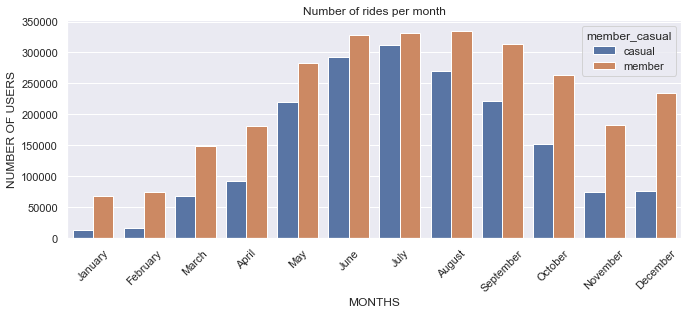

In [216]:
ax = sns.barplot(x='month_name', y='users',hue='member_casual', data=merged_cyclistic_new_8)
plt.xlabel("MONTHS")
plt.ylabel("NUMBER OF USERS")
plt.title("Number of rides per month")
plt.gcf().set_size_inches(11,4)
ax.tick_params(axis='x', rotation=45)




In [209]:
merged_cyclistic_new_9 = pd.read_sql(''' SELECT "Day of Week", member_casual, COUNT(*) AS users  
FROM merged_cyclistic_new 
GROUP BY "Day of Week", member_casual
ORDER BY (CASE "Day of Week"
when 'Monday' then 1
when 'Tuesday' then 2
when 'Wednesday' then 3
when 'Thursday' then 4
when 'Friday' then 5
when 'Saturday' then 6
when 'Sunday' then 7
END) ''', cyclist_conn)
merged_cyclistic_new_9
# we used double quotes to ensure day of week column could be queried

,Day of Week,member_casual,users
0,Monday,casual,215673
1,Monday,member,392189
2,Tuesday,casual,200265
3,Tuesday,member,428053
4,Wednesday,casual,210220
5,Wednesday,member,438189
6,Thursday,casual,238118
7,Thursday,member,441905
8,Friday,casual,257143
9,Friday,member,381444


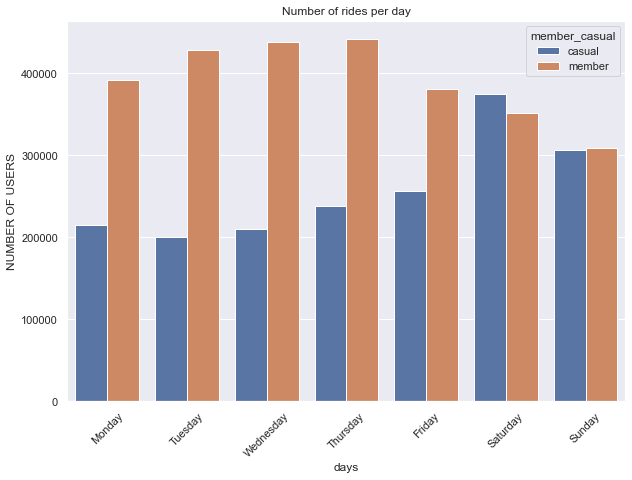

In [210]:
ax = sns.barplot(x="Day of Week", y='users',hue='member_casual', data=merged_cyclistic_new_9)
plt.xlabel("days")
plt.ylabel("NUMBER OF USERS")
plt.title("Number of rides per day")
plt.gcf().set_size_inches(10,7)
ax.tick_params(axis='x', rotation=45)

In [146]:
merged_cyclistic_new_10 = pd.read_sql(''' SELECT member_casual, COUNT(*) AS users  
FROM merged_cyclistic_new 
GROUP BY member_casual ''', cyclist_conn)
merged_cyclistic_new_10

,member_casual,users
0,casual,1803123
1,member,2742298


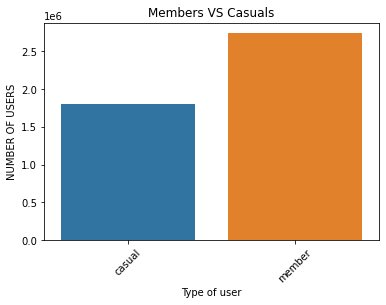

In [154]:
ax = sns.barplot(x="member_casual", y='users', data=merged_cyclistic_new_10)
plt.xlabel("Type of user")
plt.ylabel("NUMBER OF USERS")
plt.title("Members VS Casuals")
ax.tick_params(axis='x', rotation=45)
# how many users are members or not

In [166]:
merged_cyclistic_new_11 = pd.read_sql(''' SELECT (AVG(time_diff))/60 AS average_time, member_casual 
FROM merged_cyclistic_new 
GROUP BY member_casual ''', cyclist_conn)
merged_cyclistic_new_11
# how users used the bikes per rides

,average_time,member_casual
0,24.015716,casual
1,12.362806,member


In [256]:
merged_cyclistic_new_tableau = pd.read_sql(''' SELECT rideable_type, month_name, "Day of Week", strftime('%H', start_time) AS TIME
FROM merged_cyclistic_new
 ''', cyclist_conn)
merged_cyclistic_new_tableau
# how users used the bikes per rides

,rideable_type,month_name,Day of Week,TIME
0,classic_bike,August,Friday,16
1,classic_bike,August,Thursday,23
2,classic_bike,August,Sunday,14
3,electric_bike,August,Sunday,16
4,classic_bike,August,Sunday,02
...,...,...,...,...
4545416,classic_bike,September,Monday,17
4545417,classic_bike,September,Friday,17
4545418,electric_bike,September,Sunday,11
4545419,electric_bike,September,Wednesday,13


In [257]:
tableau_csv = merged_cyclistic_new_tableau.to_csv('tableau_csv.csv')

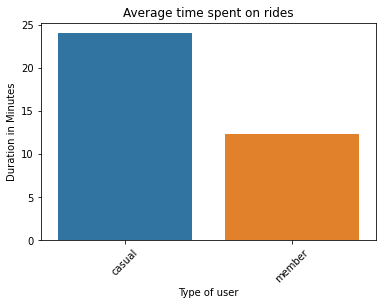

In [160]:
ax = sns.barplot(x="member_casual", y='average_time', data=merged_cyclistic_new_11)
plt.xlabel("Type of user")
plt.ylabel("Duration in Minutes")
plt.title("Average time spent on rides")
ax.tick_params(axis='x', rotation=45)

In [253]:
average_user_ride_length = merged_cyclistic_new_11.to_csv('average_user_ride_length.csv')

In [162]:
merged_cyclistic_new['rideable_type'].value_counts()

classic_bike     2697571
electric_bike    1668120
docked_bike       179730
Name: rideable_type, dtype: int64

In [205]:
merged_cyclistic_new_12 = pd.read_sql(''' SELECT (AVG(time_diff))/60 AS average_time, "Day of week", member_casual 
FROM merged_cyclistic_new 
GROUP BY member_casual, "Day of week"
ORDER BY (CASE "Day of Week"
when 'Monday' then 1
when 'Tuesday' then 2
when 'Wednesday' then 3
when 'Thursday' then 4
when 'Friday' then 5
when 'Saturday' then 6
when 'Sunday' then 7
END)  ''', cyclist_conn)
merged_cyclistic_new_12
# how users used the bikes per rides

,average_time,Day of Week,member_casual
0,24.772389,Monday,casual
1,11.955457,Monday,member
2,21.498076,Tuesday,casual
3,11.721440,Tuesday,member
4,20.877905,Wednesday,casual
5,11.758340,Wednesday,member
6,21.534367,Thursday,casual
7,11.945507,Thursday,member
8,22.365529,Friday,casual
9,12.139725,Friday,member


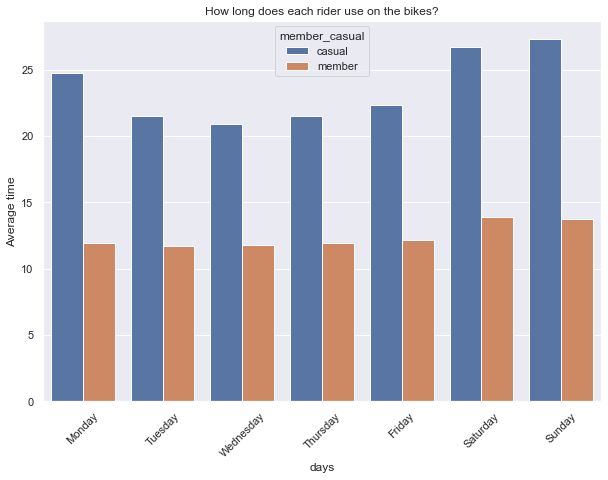

In [206]:
ax = sns.barplot(x="Day of Week", y='average_time',hue='member_casual', data=merged_cyclistic_new_12)
plt.xlabel("days")
plt.ylabel("Average time")
plt.title("How long does each rider use on the bikes?")
plt.gcf().set_size_inches(10,7)
ax.tick_params(axis='x', rotation=45)

In [252]:
average_daily_ride_length = merged_cyclistic_new_12.to_csv('average_daily_ride_length.csv')

In [207]:
merged_cyclistic_new_14 = pd.read_sql(''' SELECT strftime('%H', start_time) AS TIME, COUNT(*) AS No_of_Rides, "Day of week", member_casual 
FROM merged_cyclistic_new 
GROUP BY member_casual, strftime('%H', start_time), "Day of week"
ORDER BY (CASE "Day of Week"
when 'Monday' then 1
when 'Tuesday' then 2
when 'Wednesday' then 3
when 'Thursday' then 4
when 'Friday' then 5
when 'Saturday' then 6
when 'Sunday' then 7
END)''', cyclist_conn)
merged_cyclistic_new_14
# how users used the bikes per rides

,TIME,No_of_Rides,Day of Week,member_casual
0,00,3121,Monday,casual
1,01,1646,Monday,casual
2,02,1055,Monday,casual
3,03,790,Monday,casual
4,04,658,Monday,casual
...,...,...,...,...
331,19,16364,Sunday,member
332,20,11743,Sunday,member
333,21,9014,Sunday,member
334,22,6729,Sunday,member


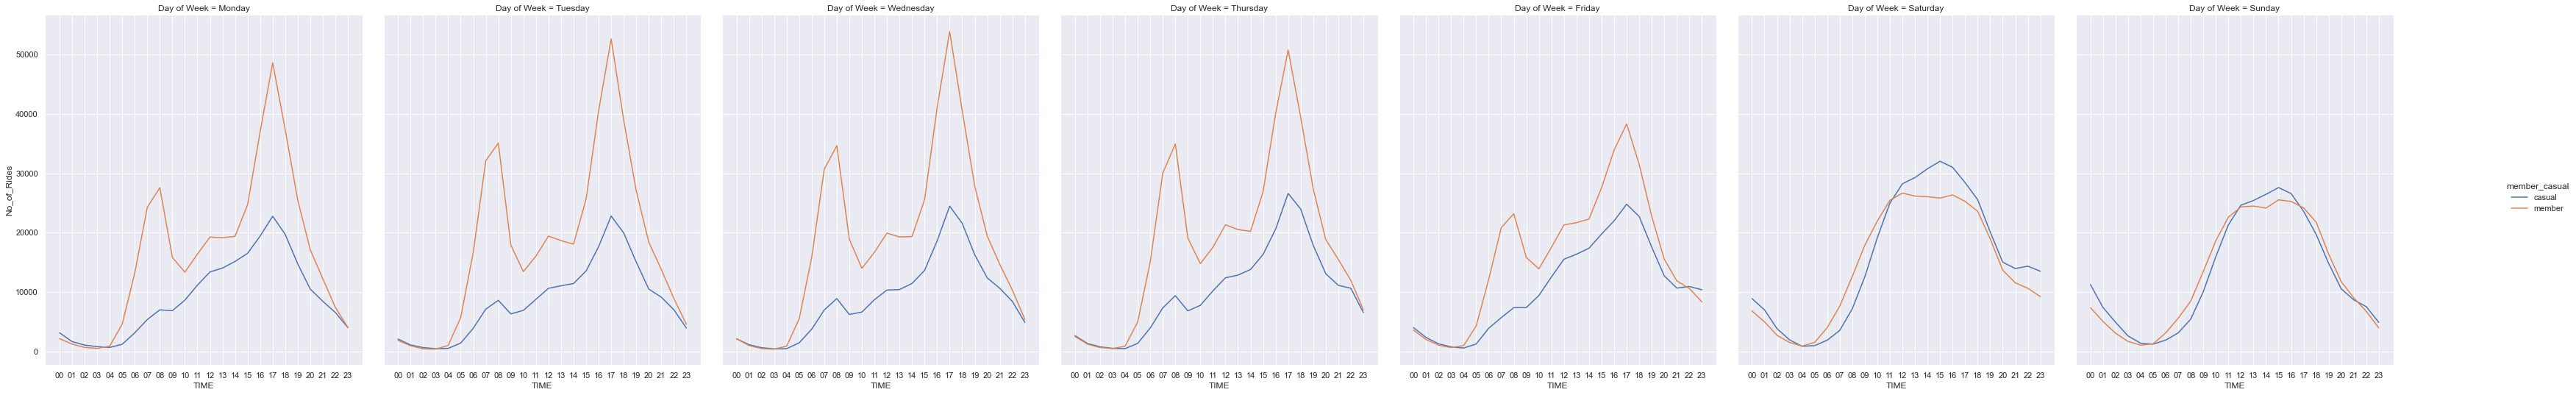

In [208]:
g = sns.FacetGrid(merged_cyclistic_new_14, col="Day of Week", hue="member_casual")
g.map_dataframe(sns.lineplot, x="TIME", y="No_of_Rides")
g.add_legend()
plt.gcf().set_size_inches(50,10)
ax.tick_params(axis='x', rotation=45)

In [251]:
hourly_day_stats = merged_cyclistic_new_14.to_csv('hourly_day_stats.csv')

In [217]:
merged_cyclistic_new_15 = pd.read_sql(''' SELECT month_name, "Day of Week", member_casual, COUNT(*) AS users  
FROM merged_cyclistic_new 
GROUP BY month_name, member_casual, "Day of Week"
ORDER BY (CASE month_name
    WHEN 'January' THEN 1
    WHEN 'February' THEN 2
    WHEN 'March' THEN 3
    WHEN 'April' THEN 4
    WHEN 'May' THEN 5
    WHEN 'June' THEN 6
    WHEN 'July' THEN 7
    WHEN 'August' THEN 8
    WHEN 'September' THEN 9
    WHEN 'October' THEN 10
    WHEN 'November' THEN 11
    WHEN 'December' THEN 12
  END) ''', cyclist_conn)
merged_cyclistic_new_15

,month_name,Day of Week,member_casual,users
0,January,Friday,casual,1698
1,January,Monday,casual,1609
2,January,Saturday,casual,2682
3,January,Sunday,casual,1700
4,January,Thursday,casual,1743
...,...,...,...,...
163,December,Saturday,member,25707
164,December,Sunday,member,19941
165,December,Thursday,member,46832
166,December,Tuesday,member,34024


In [250]:
rides_by_month = merged_cyclistic_new_15.to_csv('rides_by_month.csv')

In [221]:
merged_cyclistic_new_16 = pd.read_sql(''' SELECT  member_casual, start_station_name, COUNT(*) AS users,
start_lng, start_lat
FROM merged_cyclistic_new 
GROUP BY start_station_name
ORDER BY COUNT(*) DESC
LIMIT 10 ''', cyclist_conn)
merged_cyclistic_new_16
# MOST USED STATIONS

,member_casual,start_station_name,users,start_lng,start_lat
0,member,Streeter Dr & Grand Ave,72594,-87.612043,41.892278
1,member,DuSable Lake Shore Dr & Monroe St,40422,-87.616743,41.880958
2,casual,DuSable Lake Shore Dr & North Blvd,38167,-87.626804,41.911722
3,casual,Michigan Ave & Oak St,37862,-87.623777,41.90096
4,member,Wells St & Concord Ln,35891,-87.63485016666667,41.91189666666666
5,casual,Clark St & Elm St,34125,-87.6316055,41.90294216666667
6,casual,Millennium Park,33887,-87.624084,41.881032
7,member,Kingsbury St & Kinzie St,33410,-87.638408,41.88913466666666
8,member,Theater on the Lake,31660,-87.630834,41.926277
9,member,Wells St & Elm St,30328,-87.634324,41.903222


In [249]:
most_used_stations = merged_cyclistic_new_16.to_csv('most_used_stations.csv')

In [244]:
merged_cyclistic_new_17 = pd.read_sql(''' SELECT (AVG(time_diff))/60 AS average_time, member_casual, rideable_type
FROM merged_cyclistic_new 
GROUP BY member_casual, rideable_type ''', cyclist_conn)
merged_cyclistic_new_17
# MOST USED STATIONS

,average_time,member_casual,rideable_type
0,24.393153,casual,classic_bike
1,51.591231,casual,docked_bike
2,16.604287,casual,electric_bike
3,13.139864,member,classic_bike
4,10.904178,member,electric_bike


In [247]:
merged_cyclistic_new_18 = pd.read_sql(''' SELECT *
FROM merged_cyclistic_new 
WHERE member_casual = 'member' AND rideable_type = 'docked_bike' ''', cyclist_conn)
merged_cyclistic_new_18

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Day of Week,start_time,end_time,month_name,time_diff


In [248]:
rideable_time_type_csv = merged_cyclistic_new_17.to_csv('rideable_time_type.csv')
